# Crime in India
    - Source : https://www.kaggle.com/rajanand/crime-in-india
    
![img](0_Img/indiacrime.JPG)

In [1]:
import numpy as np
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import plotly.express as px
import plotly.graph_objects as go
import plotly.figure_factory as ff
from plotly.colors import n_colors
from plotly.subplots import make_subplots
init_notebook_mode(connected = True)
import cufflinks as cf
cf.go_offline()
import warnings
warnings.filterwarnings(action = 'ignore')

In [2]:
victims = pd.read_csv('C:/workspace/Data/crime-in-india/20_Victims_of_rape.csv')
police_hr = pd.read_csv('C:/workspace/Data/crime-in-india/35_Human_rights_violation_by_police.csv')
auto_theft = pd.read_csv('C:/workspace/Data/crime-in-india/30_Auto_theft.csv')
prop_theft = pd.read_csv('C:/workspace/Data/crime-in-india/10_Property_stolen_and_recovered.csv')

## 강간 사건
- 강간은 인도에서 네번째로 많은 범죄율을 기록한다. 강간금지법은 인도 형법 376에 따른다. 근친상간사건은 가해자가 피해자를 인지하고 있다는 조건하에 등록이된다 (??)
    * 원문 : Incest rape cases are registered under the condition where the offender is known to the victim.
- 다음은 2001 ~ 2010 년도 인도에서 일어난 근친상간사건의 통계치이다

### 2001 ~ 2010 년도 인도에서 일어난 근친상간사건의 통계치

In [3]:
victims[:5]

,Area_Name,Year,Subgroup,Rape_Cases_Reported,Victims_Above_50_Yrs,Victims_Between_10-14_Yrs,Victims_Between_14-18_Yrs,Victims_Between_18-30_Yrs,Victims_Between_30-50_Yrs,Victims_of_Rape_Total,Victims_Upto_10_Yrs
0,Andaman & Nicobar Islands,2001,Total Rape Victims,3,0,0,3,0,0,3,0
1,Andaman & Nicobar Islands,2001,Victims of Incest Rape,1,0,0,1,0,0,1,0
2,Andaman & Nicobar Islands,2001,Victims of Other Rape,2,0,0,2,0,0,2,0
3,Andaman & Nicobar Islands,2002,Total Rape Victims,2,0,0,1,1,0,2,0
4,Andaman & Nicobar Islands,2002,Victims of Incest Rape,0,0,0,0,0,0,0,0


In [4]:
incest = victims.loc[victims['Subgroup'] == 'Victims of Incest Rape']
incest = incest.groupby('Year').sum()
incest

,Rape_Cases_Reported,Victims_Above_50_Yrs,Victims_Between_10-14_Yrs,Victims_Between_14-18_Yrs,Victims_Between_18-30_Yrs,Victims_Between_30-50_Yrs,Victims_of_Rape_Total,Victims_Upto_10_Yrs
Year,,,,,,,,
2001,439,1,63,112,170,69,439,24
2002,369,5,58,77,176,38,369,15
2003,399,0,41,99,206,31,400,23
2004,505,1,43,134,250,66,506,12
2005,750,3,64,164,357,126,750,36
2006,431,3,55,112,182,55,431,24
2007,405,2,45,114,167,49,405,28
2008,309,8,54,75,117,32,309,23
2009,321,2,31,76,158,31,322,24


In [5]:
fig = px.bar(incest, x = incest.index, y = 'Rape_Cases_Reported', title = 'Total Number of Cases of Incest Rape')
fig.show()

- 2005년 750회로 정점을 찍고 점점 감소하는 추세를 보인다
- 최저점은 2010년으로 총 288회

### 2001 ~ 2010년에 State/Ut단위로 보고된 근친상간 건수

In [6]:
inc_victims = victims[victims['Subgroup'] == 'Victims of Incest Rape']

In [7]:
incest2 = pd.DataFrame(inc_victims.groupby(['Area_Name'])['Rape_Cases_Reported'].sum().reset_index())
incest2.columns = ['State/UT', 'Cases Reported']
incest2.replace(to_replace = 'Arunachal Pardesh', value = 'Arunachal Pradesh', inplace = True) # geo-data의 이름으로 맞춰주자

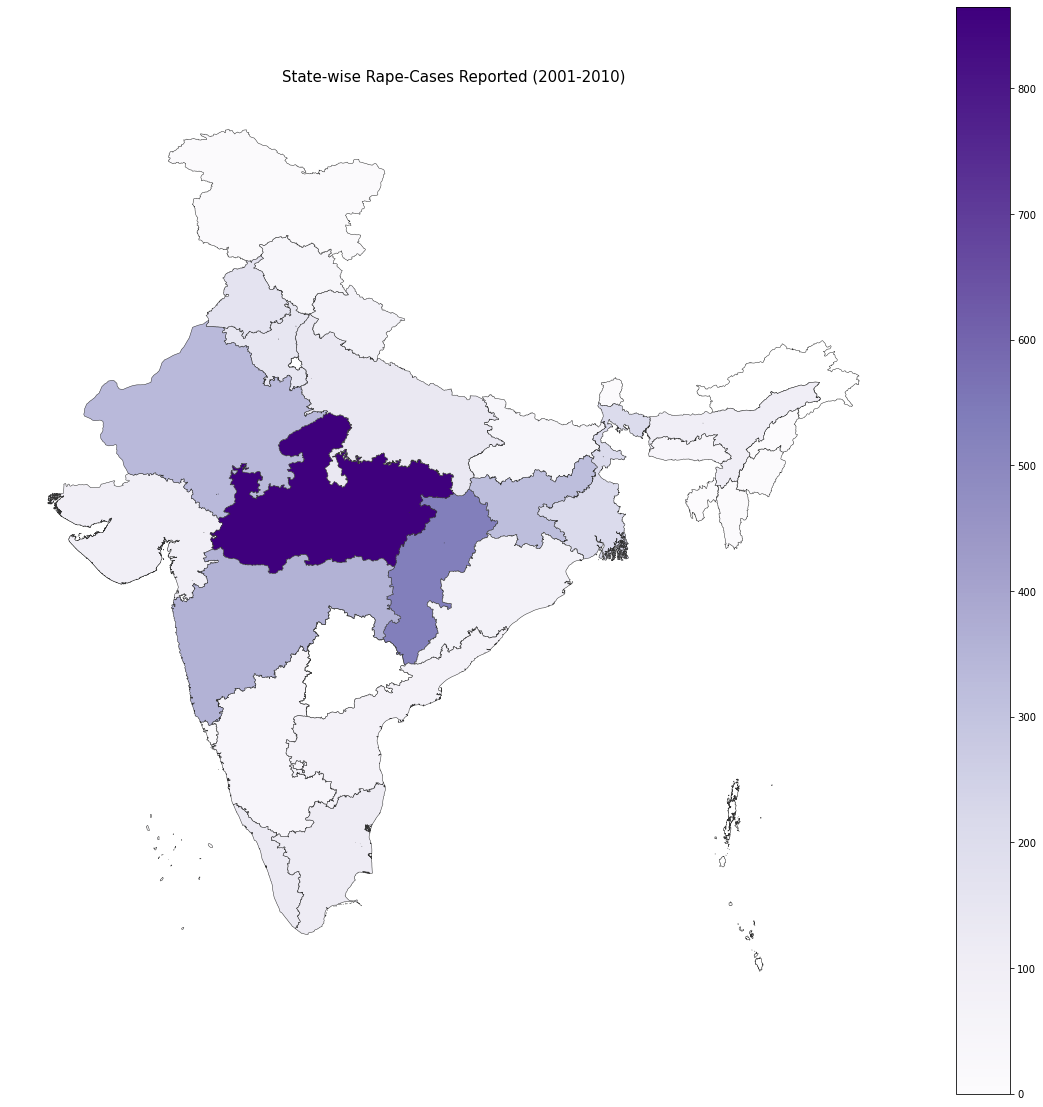

In [8]:
shg_gdf = gpd.read_file('C:/workspace/Data/India States/Indian_states.shp')
merged = shg_gdf.set_index('st_nm').join(incest2.set_index('State/UT'))

fig, ax = plt.subplots(1, figsize = (20, 20))
ax.axis('off')
ax.set_title('State-wise Rape-Cases Reported (2001-2010)',
            fontdict = {'fontsize' : '15', 'fontweight' : '3'})
fig = merged.plot(column = 'Cases Reported', cmap = 'Purples', linewidth = .5, ax = ax, edgecolor = '0.2', legend = True)

- 근친상간 범죄율이 가장 높은 3개의 주 : Madhya Pradhesh, Chhatisgarh, Rajasthan
- 근친상간 범죄율이 가장 낮은 3개의 주 : Tripura, Manipur, Goa

In [9]:
ins = victims.loc[victims['Subgroup'] == 'Victims of Incest Rape']
ins = ins.groupby(['Area_Name'])['Rape_Cases_Reported'].sum().sort_values()
ins

Area_Name
Arunachal Pradesh              0
Lakshadweep                    0
Puducherry                     0
Dadra & Nagar Haveli           0
Daman & Diu                    0
Andaman & Nicobar Islands      1
Nagaland                       4
Tripura                        5
Manipur                        7
Goa                            7
Sikkim                        10
Jammu & Kashmir               12
Mizoram                       13
Chandigarh                    17
Himachal Pradesh              43
Bihar                         43
Karnataka                     46
Meghalaya                     46
Andhra Pradesh                70
Uttarakhand                   71
Odisha                        73
Gujarat                       97
Assam                        101
Tamil Nadu                   116
Kerala                       128
Uttar Pradesh                138
Haryana                      149
Punjab                       163
West Bengal                  211
Delhi                        231


### 피해자들의 연령분포도

In [10]:
por = victims[['Subgroup', 'Rape_Cases_Reported', 'Victims_Above_50_Yrs', 'Victims_Between_10-14_Yrs',
       'Victims_Between_14-18_Yrs', 'Victims_Between_18-30_Yrs',
       'Victims_Between_30-50_Yrs', 'Victims_Upto_10_Yrs']]
por[:2]

,Subgroup,Rape_Cases_Reported,Victims_Above_50_Yrs,Victims_Between_10-14_Yrs,Victims_Between_14-18_Yrs,Victims_Between_18-30_Yrs,Victims_Between_30-50_Yrs,Victims_Upto_10_Yrs
0,Total Rape Victims,3,0,0,3,0,0,0
1,Victims of Incest Rape,1,0,0,1,0,0,0


In [11]:
por = por.loc[por['Subgroup'] == 'Victims of Incest Rape']

above_50 = por['Victims_Above_50_Yrs'].sum()
Bet_10_14 =  por['Victims_Between_10-14_Yrs'].sum()
Bet_14_18 =  por['Victims_Between_14-18_Yrs'].sum()
Bet_18_30 =  por['Victims_Between_18-30_Yrs'].sum()
Bet_30_50 =  por['Victims_Between_30-50_Yrs'].sum()
upto_10 = por['Victims_Upto_10_Yrs'].sum()

age_group = ['Upto 10', '10 to 14', '14 to 18', '18 to 30', '30 to 50', 'Above 50']
age_group_value = [upto_10, Bet_10_14, Bet_14_18, Bet_18_30, Bet_30_50, above_50]

fig = px.pie(values = age_group_value, names = age_group)

fig.show()

- **18 to 30**의 그룹이 가장이 많은 비율
- **Above 50**의 그룹이 가장 낮은 비율

## 경찰에 의한 인권탄압
- 인도에서의 인권탄압은 국가의 큰 크기, 인구, 빈번해있는 가난, 적절한 교육의 결핍, 다양한 문화 등에 의해 복잡한 문제를 가집니다

### State/UT 단위에서 나타난 인권탄압폭력 ( 2001 ~ 2010 )

In [12]:
police_hr[:5]

,Area_Name,Year,Group_Name,Sub_Group_Name,Cases_Registered_under_Human_Rights_Violations,Policemen_Chargesheeted,Policemen_Convicted
0,Andhra Pradesh,2001,HR_Disappearance of Persons,01. Disappearance of Persons,0.0,0.0,0.0
1,Arunachal Pradesh,2001,HR_Disappearance of Persons,01. Disappearance of Persons,0.0,0.0,0.0
2,Assam,2001,HR_Disappearance of Persons,01. Disappearance of Persons,0.0,0.0,0.0
3,Bihar,2001,HR_Disappearance of Persons,01. Disappearance of Persons,0.0,0.0,0.0
4,Chandigarh,2001,HR_Disappearance of Persons,01. Disappearance of Persons,0.0,0.0,0.0


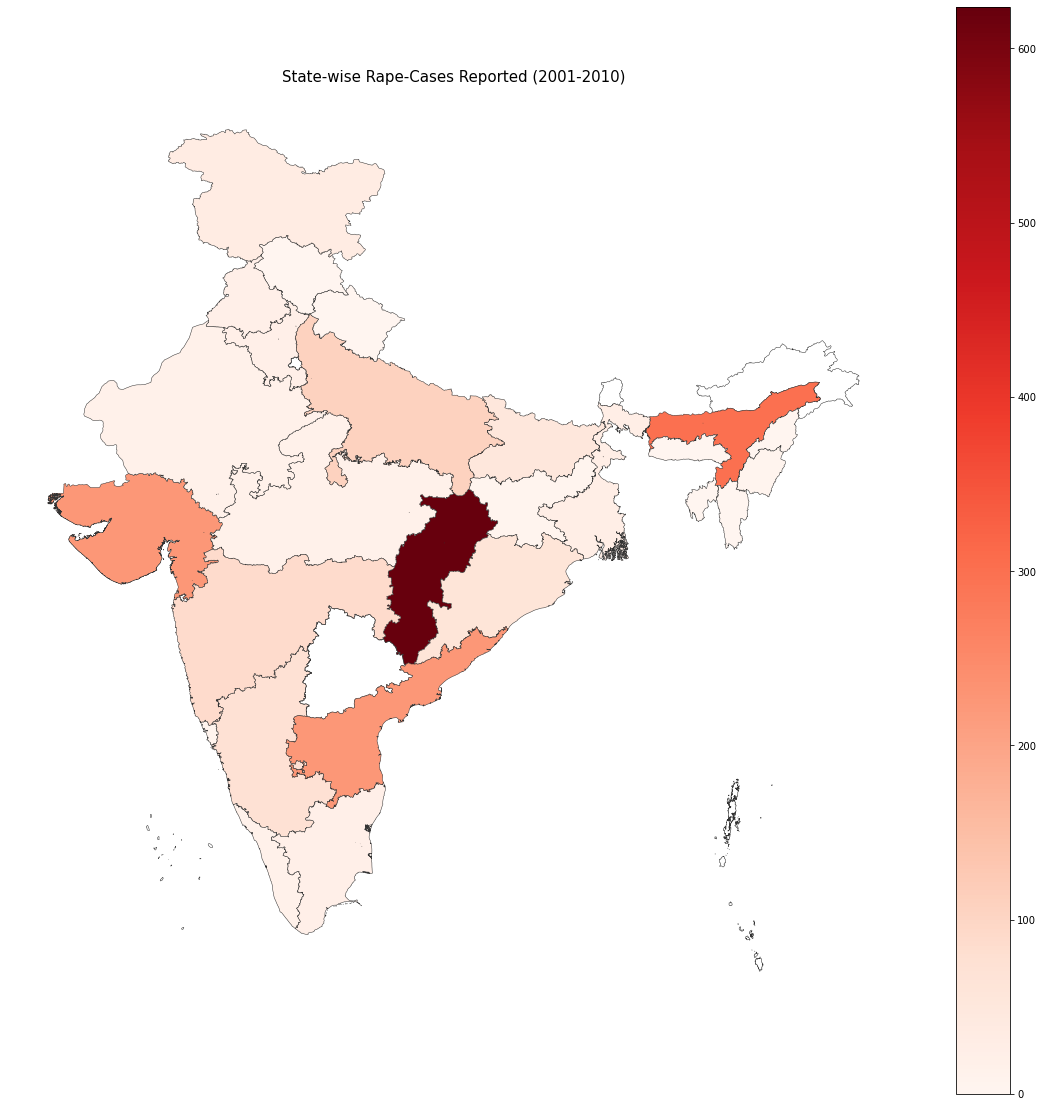

In [13]:
police = pd.DataFrame(police_hr.groupby(['Area_Name'])['Cases_Registered_under_Human_Rights_Violations'].sum().reset_index())
police.columns = ['State/UT', 'Cases Reported']
police.replace(to_replace = 'Arunachal Pardesh', value = 'Arunachal Pradesh', inplace = True)

shg_gdf = gpd.read_file('C:/workspace/Data/India States/Indian_states.shp')
merged = shg_gdf.set_index('st_nm').join(police.set_index('State/UT'))

fig, ax = plt.subplots(1, figsize = (20, 20))
ax.axis('off')
ax.set_title('State-wise Rape-Cases Reported (2001-2010)',
            fontdict = {'fontsize' : '15', 'fontweight' : '3'})
fig = merged.plot(column = 'Cases Reported', cmap = 'Reds', linewidth = .5, ax = ax, edgecolor = '0.2', legend = True)

- 가장 높은 3개의 주 : Chhatisgrah, Assam, Gujarat
- 가장 낮은 3개의 주 : Manipur, Uttarakhand, Goa

### 경찰에 의해 가행된 인권탄압 ( 2001 ~ 2010 )

In [14]:
police_hr

,Area_Name,Year,Group_Name,Sub_Group_Name,Cases_Registered_under_Human_Rights_Violations,Policemen_Chargesheeted,Policemen_Convicted
0,Andhra Pradesh,2001,HR_Disappearance of Persons,01. Disappearance of Persons,0.0,0.0,0.0
1,Arunachal Pradesh,2001,HR_Disappearance of Persons,01. Disappearance of Persons,0.0,0.0,0.0
2,Assam,2001,HR_Disappearance of Persons,01. Disappearance of Persons,0.0,0.0,0.0
3,Bihar,2001,HR_Disappearance of Persons,01. Disappearance of Persons,0.0,0.0,0.0
4,Chandigarh,2001,HR_Disappearance of Persons,01. Disappearance of Persons,0.0,0.0,0.0
...,...,...,...,...,...,...,...
2262,Meghalaya,2010,HR_Total Violations by Police,12. Total (Sum of 1-11 Above),0.0,0.0,0.0
2263,Nagaland,2010,HR_Total Violations by Police,12. Total (Sum of 1-11 Above),0.0,0.0,0.0
2264,Odisha,2010,HR_Total Violations by Police,12. Total (Sum of 1-11 Above),5.0,1.0,0.0
2265,Uttar Pradesh,2010,HR_Total Violations by Police,12. Total (Sum of 1-11 Above),6.0,5.0,0.0


In [15]:
police_rr = pd.DataFrame(police_hr.groupby('Year')['Cases_Registered_under_Human_Rights_Violations'].sum().reset_index())
police_rr.columns = ['Year', 'Cases Registered']

fig = px.bar(police_rr, x = police_rr['Year'], y = police_rr['Cases Registered'])
fig.show()

- 2007년 이후, 2008년에 왜 갑자기 수치가 올라갔을까?
    * source : https://www.hrw.org/world-report/2008/country-chapters/india
    * Assam
        - Violence has continued in the northeast, particularly in Manipur, where over 300 people, including nearly a hundred civilians, were killed in the armed conflict in 2008. Caught between the armed groups and security forces, civilians also remain victims of human rights abuses.
        - A series of bomb attacks in Guwahati and other cities in Assam on October 30, 2008, killed 84 people and injured hundreds. Police believe the bombings may have been acts of revenge for earlier attacks on Bangladeshi Muslim settlers by local tribes in which nearly 50 people were killed.
        - In Manipur, security forces have been responsible for extrajudicial killings and torture. The impunity and free rein given to government forces has led to a culture where many soldiers and police officers appear to believe it is easier to kill suspects than gather evidence to secure convictions.
        - Despite the large deployment of government forces, armed groups claiming to protect the rights of the various ethnic communities in Manipur have succeeded in imposing their will on many communities. Manipuris are forced to build alliances with one group to ensure protection from the rest. Armed groups are responsible for extortion, killings, forced recruitment-including of children-and imposition of moral diktats, often by force.
    * Gujarat
        - The government has failed to protect vulnerable communities including Dalits, tribal groups, and religious minorities.
        
    * soruce : https://2009-2017.state.gov/j/drl/rls/hrrpt/2008/sca/119134.htm
        - In April the Supreme Court directed the NHRC to investigate alleged human rights violations in Chhattisgarh connected with the government-sponsored counterinsurgency efforts.....(중략)
        - On September 20, the Supreme Court asked the Chhattisgarh government to implement the NHRC's recommendations concerning allegations of human rights abuses by the state-sponsored counterinsurgency campaign Salwa Judum, SPOs, other security forces, and the Naxalites. The NHRC recommended further investigation into allegations of human rights violations, including extrajudicial killings.
- 요약하자면, 인도에선 폭력, 무장세력에 의한 범법행위 등이 무차별하게 나타나고있다
- 정부로부터 지원받는 반란군의 반모가 Chhattisgarh지역 내에서 일어났고 인권탄압을 수사중이다
- 미연방대법원은 Chhattisgarh정부에게 정부로부터 지원받는 단체에 의해 자행된 범법행위인 인권탄압에 대해 조사해줄것을 요청했다
- 또한, 기본권침해에 대한 폭력과 사적제재에 대한 추가적인 혐의도 조사할것을 요청했다

### Types of Human Rights violations

In [16]:
police_hr.value_counts('Group_Name')

Group_Name
HR_Total Violations by Police                 214
HR_Others Violations by Police                194
HR_Disappearance of Persons                   190
HR_Extortion                                  190
HR_Torture                                    190
HR_Atrocities on SC/ST                        188
HR_Illegal detention/arrests                  186
HR_Fake encounter killings                    185
HR_Indignity to Women                         185
HR_False implication                          182
HR_Violation against Terrorists/Extremists    182
HR_Failure in taking action                   181
dtype: int64

### Cases Registered under Human Rights violation - Fake encounter killings

In [17]:
fake_enc_kill = police_hr[police_hr['Group_Name'] == 'HR_Fake encounter killings']
fake_enc_kill['Cases_Registered_under_Human_Rights_Violations'].value_counts().sum()

185

### False Implication

In [18]:
false_imp = police_hr[police_hr['Group_Name'] == 'HR_False implication']
false_imp['Cases_Registered_under_Human_Rights_Violations'].value_counts().sum()

182

In [19]:
policemen = pd.DataFrame(police_hr.groupby('Year')['Policemen_Chargesheeted', 'Policemen_Convicted'].sum().reset_index())
policemen

,Year,Policemen_Chargesheeted,Policemen_Convicted
0,2001,270.0,4.0
1,2002,118.0,0.0
2,2003,46.0,20.0
3,2004,44.0,0.0
4,2005,42.0,0.0
5,2006,56.0,0.0
6,2007,74.0,0.0
7,2008,28.0,16.0
8,2009,166.0,116.0
9,2010,28.0,8.0


In [20]:
fig = go.Figure(data = [
    go.Bar(name = 'Policemen Chargesheeted', 
           x = policemen['Year'], 
           y = policemen['Policemen_Chargesheeted']),
    go.Bar(name = 'Policement Convicted', 
           x = policemen['Year'], 
           y = policemen['Policemen_Convicted'],
          marker_color = 'purple')
])

fig.update_layout(barmode = 'group', xaxis_title = 'Year', yaxis_title = 'Number of policemen', title = 'False Implication')
fig.show()

- 유죄판결
    - 2009년 116건의 유죄판결로 가장 높은 수치 기록
    - 2004 ~ 2006년엔 단 한건도 없음
- 기소
    - 2001년 270건으로 가장 많은 해를 기록했으나 유죄판결은 단 4건으로 0.01%
    
- 2009년 166건이 기소되고 116건이 유죄판결 > 약 70% 유죄

## Auto Theft cases

### State/UT 단위에서 나타난 차량절도사건 ( 2001 ~ 2010 )

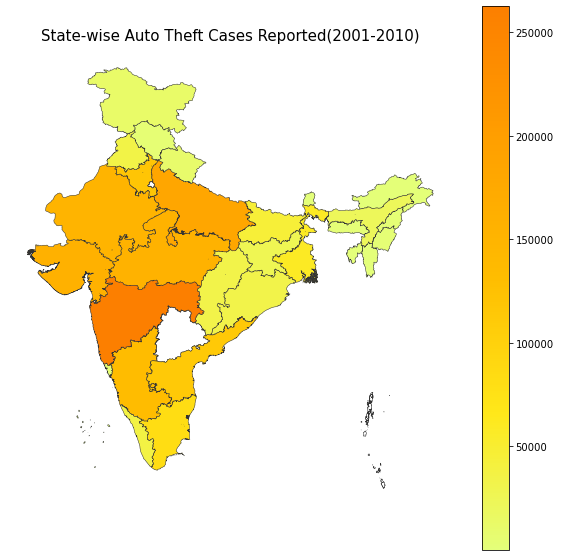

In [21]:
g5 = pd.DataFrame(auto_theft.groupby(['Area_Name'])['Auto_Theft_Stolen'].sum().reset_index())
g5.columns = ['State/UT','Vehicle_Stolen']
g5.replace(to_replace='Arunachal Pradesh',value='Arunanchal Pradesh',inplace=True)

shp_gdf = gpd.read_file('C:/workspace/Data/India States/Indian_states.shp')
merged = shp_gdf.set_index('st_nm').join(g5.set_index('State/UT'))

fig, ax = plt.subplots(1, figsize=(10, 10))
ax.axis('off')
ax.set_title('State-wise Auto Theft Cases Reported(2001-2010)',
             fontdict={'fontsize': '15', 'fontweight' : '3'})
fig = merged.plot(column='Vehicle_Stolen', cmap='Wistia', linewidth=0.5, ax=ax, edgecolor='0.2',legend=True)

- 가장 많은 3개의 주 : Maharashtra, Uttar Pradesh,Gujarat
- 가장 적은 3개의 주 : Sikkim, Mizoram, Tripura

### 훔쳐진, 추적된, 발견된 교통수단의 비율

In [22]:
ta_traced = auto_theft['Auto_Theft_Coordinated/Traced'].sum()
ta_recovered = auto_theft['Auto_Theft_Recovered'].sum()
ta_stolen = auto_theft['Auto_Theft_Stolen'].sum()

ta_values = [ta_traced, ta_recovered, ta_stolen]
ta_group = ['Vehicles Traced', 'Vehicles Recovered', 'Vehicles Stolen']

fig = px.pie(values = ta_values, names = ta_group)

fig.show()

- 총 2,467,182건 중에 21%가 차량절도에 해당

### 차량절도 연간통계

In [23]:
yr_ta = pd.DataFrame(auto_theft.groupby('Year')['Auto_Theft_Coordinated/Traced', 'Auto_Theft_Recovered', 'Auto_Theft_Stolen'].sum().reset_index())

fig = px.bar(yr_ta, x = 'Year', y = 'Auto_Theft_Stolen')
fig.update_layout(yaxis_title = 'Stolen Vehicles', title = 'Stolen Vehicles', title_x = 0.5)

fig.show()

- 선형적인 성장곡선을 그리고있다
- 2020년엔 약 46만건의 차량절도범행이 나타났다

### 차량절도의 유형

In [24]:
auto_theft[:5]

,Area_Name,Year,Group_Name,Sub_Group_Name,Auto_Theft_Coordinated/Traced,Auto_Theft_Recovered,Auto_Theft_Stolen
0,Andaman & Nicobar Islands,2001,AT1-Motor Cycles/ Scooters,1. Motor Cycles/ Scooters,NaN,4.0,4
1,Andhra Pradesh,2001,AT1-Motor Cycles/ Scooters,1. Motor Cycles/ Scooters,136.0,1311.0,2725
2,Arunachal Pradesh,2001,AT1-Motor Cycles/ Scooters,1. Motor Cycles/ Scooters,0.0,21.0,27
3,Assam,2001,AT1-Motor Cycles/ Scooters,1. Motor Cycles/ Scooters,0.0,94.0,205
4,Bihar,2001,AT1-Motor Cycles/ Scooters,1. Motor Cycles/ Scooters,44.0,205.0,946


In [25]:
auto_theft.value_counts('Sub_Group_Name')

Sub_Group_Name
6. Total (Sum of 1-5 Above)                      344
1. Motor Cycles/ Scooters                        341
2. Motor Car/Taxi/Jeep                           331
5. Other Motor vehicles                          303
4. Goods carrying vehicles (Trucks/Tempo etc)    292
3. Buses                                         254
dtype: int64

In [26]:
vehicle_list = ['Motor Cycles/ Scooters','Motor Car/Taxi/Jeep','Buses',
               'Goods carrying vehicles (Trucks/Tempo etc)','Other Motor vehicles']

sr_no = [1,2,3,4,5]

fig = go.Figure(data=[go.Table(header=dict(values=['Sr No','Vehicle type'],
                                          fill_color='turquoise',
                                           height=30),
                 cells=dict(values=[sr_no,vehicle_list],
                            height=30))
                     ])
fig.show()

### 오토바이 절도에 있어서 가장 높은 수를 기록한 10개의 State/UT

In [27]:
auto_theft_10 = auto_theft[auto_theft['Sub_Group_Name'] == '1. Motor Cycles/ Scooters']
auto_theft_10 = pd.DataFrame(auto_theft_10.groupby('Area_Name').sum().reset_index())
auto_theft_10 = auto_theft_10[['Area_Name', 'Auto_Theft_Stolen']].sort_values(by = 'Auto_Theft_Stolen', ascending = False)[:10]
auto_theft_10 = auto_theft_10.reset_index()
auto_theft_10 = auto_theft_10.drop('index', axis = 1)
auto_theft_10

,Area_Name,Auto_Theft_Stolen
0,Maharashtra,103096
1,Uttar Pradesh,70810
2,Gujarat,69414
3,Madhya Pradesh,68913
4,Rajasthan,63423
5,Karnataka,55673
6,Delhi,50884
7,Andhra Pradesh,48654
8,Haryana,41915
9,Tamil Nadu,37656


In [28]:
fig = px.bar(auto_theft_10, x = 'Auto_Theft_Stolen', y = 'Area_Name')
fig.show()

- Maharashtra 지역에서 차량절도 범죄 약 10만건으로 압도적인 수치를 기록

## 재산절도

### State/UT 단위에서 나타난 재산절도 ( 2001 ~ 2010 )

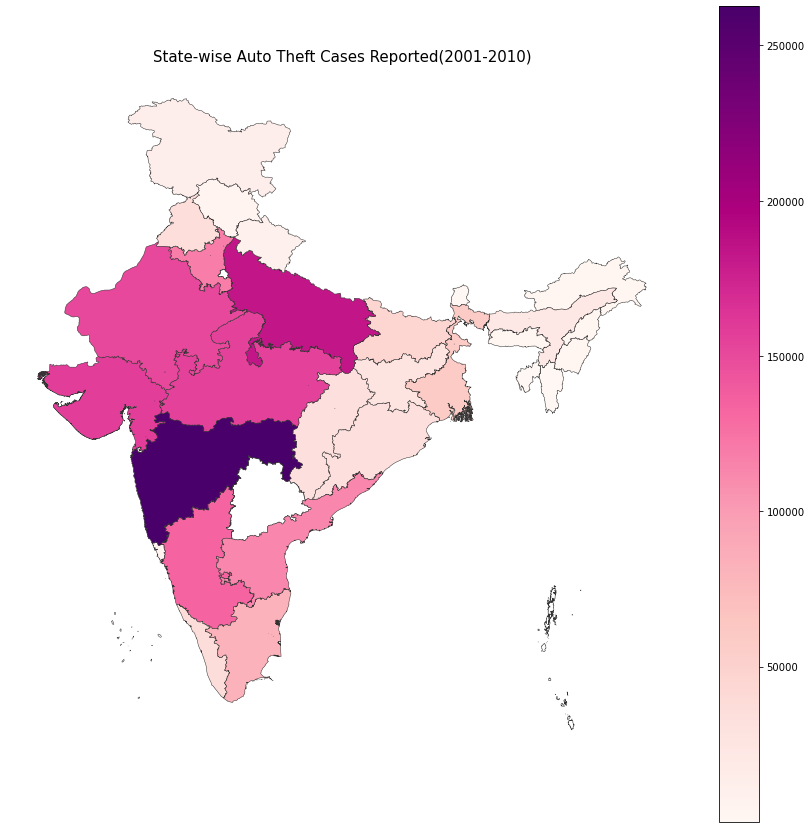

In [29]:
g7 = pd.DataFrame(prop_theft.groupby('Area_Name')['Cases_Property_Stolen'].sum().reset_index())
g7.columns = ['State/UT', 'Cases Reported']
g7.replace(to_replace = 'Arunachal Pradeh', value = 'Arunanchal Pradesh', inplace = True)

shp_gdf = gpd.read_file('C:/workspace/Data/India States/Indian_states.shp')
merged = shp_gdf.set_index('st_nm').join(g5.set_index('State/UT'))

fig, ax = plt.subplots(1, figsize=(15, 15))
ax.axis('off')
ax.set_title('State-wise Auto Theft Cases Reported(2001-2010)',
             fontdict={'fontsize': '15', 'fontweight' : '3'})
fig = merged.plot(column='Vehicle_Stolen', cmap='RdPu', linewidth=0.5, ax=ax, edgecolor='0.2',legend=True)

### 재산절도 범죄 유형

In [30]:
prop_theft.value_counts('Sub_Group_Name', normalize = True)

Sub_Group_Name
1. Dacoity                              0.142915
2. Robbery                              0.142915
3. Burglary                             0.142915
4. Theft                                0.142915
5. Criminal Breach of Trust             0.142915
6. Other Property                       0.142915
7. Total Property Stolen & Recovered    0.142507
dtype: float64

### Proportion of Recovered / Stolen

In [31]:
recovered_prop = prop_theft['Cases_Property_Recovered'].sum()
stolen_prop = prop_theft['Cases_Property_Stolen'].sum()

prop_value = [recovered_prop, stolen_prop]
prop_group = ['Recovered Property', 'Stolen Property']

fig = px.pie(names = prop_group, values = prop_value)
fig.show()

### Year-wise Proportion of Property stolen and recovered

In [32]:
yearly_prop_theft = pd.DataFrame(prop_theft.groupby('Year')['Cases_Property_Recovered', 'Cases_Property_Stolen'].sum().reset_index())

fig = go.Figure(data = [
    go.Bar(name = 'Property Recovered',
          x = yearly_prop_theft['Year'],
          y = yearly_prop_theft['Cases_Property_Recovered']),
    go.Bar(name = 'Property Stolen',
          x = yearly_prop_theft['Year'],
          y = yearly_prop_theft['Cases_Property_Stolen'],
          marker_color = 'Purple')
])
fig.update_layout(barmode = 'group', xaxis_title = 'Year', yaxis_title = 'Proportion of Cases',
                 title = 'Year-wise Proportion of Property Stolen and Recovered')
fig.show()

### Year-wise Value of Property stolen and recovered

In [33]:
g9 = pd.DataFrame(prop_theft.groupby(['Year'])['Value_of_Property_Recovered','Value_of_Property_Stolen'].sum().reset_index())

year=['2001','2002','2003','2004','2005','2006','2007','2008','2009','2010']

fig = go.Figure(data=[
    go.Bar(name='Property Recovered', x=year, y=g9['Value_of_Property_Recovered']),
    go.Bar(name='Property Stolen', x=year, y=g9['Value_of_Property_Stolen'])
])

fig.update_layout(barmode='group',xaxis_title='Year',yaxis_title='Value in Rupees',
                 title='Year-wise Value of Property Stolen and Recovered')
fig.show()

## Crime for Women

In [21]:
crime42 = pd.read_csv('C:/workspace/Data/crime-in-india/crime/crime/42_District_wise_crimes_committed_against_women_2001_2012.csv')
crime43 = pd.read_csv('C:/workspace/Data/crime-in-india/crime/crime/42_District_wise_crimes_committed_against_women_2013.csv')
crime44 = pd.read_csv('C:/workspace/Data/crime-in-india/crime/crime/42_District_wise_crimes_committed_against_women_2014.csv')

In [22]:
crime43['STATE/UT'] = crime43['STATE/UT'].str.upper()
crime43['DISTRICT'].replace(to_replace = 'ZZ TOTAL', value = 'TOTAL', inplace = True)
crime43 = crime43.replace(to_replace = 'A&N ISLANDS', value = 'A & N ISLANDS')
crime43 = crime43.replace(to_replace = 'D&N HAVELI', value = 'D & N HAVELI')
crime43 = crime43.replace(to_replace = 'DELHI UT', value = 'DELHI')

In [23]:
crime44 = crime44[['States/UTs', 'District', 'Year', 'Rape', 'Kidnapping & Abduction_Total', 
                   'Dowry Deaths', 'Assault on Women with intent to outrage her Modesty_Total',
                  'Insult to the Modesty of Women_Total', 'Cruelty by Husband or his Relatives',
                  'Importation of Girls from Foreign Country']]
crime44 = crime44.rename(columns = {'States/UTs' : 'STATE/UT',
                                   'District' : 'DISTRICT',
                                   'Kidnapping & Abduction_Total' : 'Kidnapping and Abduction',
                                   'Assault on Women with intent to outrage her Modesty_Total' : 'Assault on women with intent to outrage her modesty',
                                   'Insult to the Modesty of Women_Total' : 'Insult to modesty of Women',
                                   'Cruelty by Husband or his Relatives' : 'Cruelty by Husband or his Relatives',
                                   'Importation of Girls from Foreign Country' : 'Importation of Girls'})
crime44['STATE/UT'] = crime44['STATE/UT'].str.upper()
crime44['DISTRICT'] = crime44['DISTRICT'].str.upper()
crime44 = crime44.replace(to_replace = 'A&N ISLANDS', value = 'A & N ISLANDS')
crime44 = crime44.replace(to_replace = 'D&N HAVELI', value = 'D & N HAVELI')
crime44 = crime44.replace(to_replace = 'DELHI UT', value = 'DELHI')

In [24]:
print("DF_crime42: {}\nDF_crime43: {}\nDF_crime44: {}".format(len(crime42), len(crime43), len(crime44)))
crime_women = pd.concat([crime42, crime43, crime44])
print("Merged_DF_crime_women: {}".format(len(crime_women)))

DF_crime42: 9017
DF_crime43: 823
DF_crime44: 837
Merged_DF_crime_women: 10677


In [25]:
## 최종데이터프레임
crime_women = crime_women.reset_index()
crime_women = crime_women.drop('index', axis = 1)
crime_women

,STATE/UT,DISTRICT,Year,Rape,Kidnapping and Abduction,Dowry Deaths,Assault on women with intent to outrage her modesty,Insult to modesty of Women,Cruelty by Husband or his Relatives,Importation of Girls
0,ANDHRA PRADESH,ADILABAD,2001,50,30,16,149,34,175,0
1,ANDHRA PRADESH,ANANTAPUR,2001,23,30,7,118,24,154,0
2,ANDHRA PRADESH,CHITTOOR,2001,27,34,14,112,83,186,0
3,ANDHRA PRADESH,CUDDAPAH,2001,20,20,17,126,38,57,0
4,ANDHRA PRADESH,EAST GODAVARI,2001,23,26,12,109,58,247,0
...,...,...,...,...,...,...,...,...,...,...
10672,LAKSHADWEEP,LAKSHADWEEP,2014,1,0,0,1,2,0,0
10673,LAKSHADWEEP,TOTAL,2014,1,0,0,1,2,0,0
10674,PUDUCHERRY,KARAIKAL,2014,3,1,0,12,1,1,0
10675,PUDUCHERRY,PUDUCHERRY,2014,7,6,1,20,7,3,0


### Visualization to Geo-data

In [27]:
india_shp = gpd.read_file('C:/workspace/Data/India States/Indian_states.shp')
india_shp['st_nm'] = india_shp['st_nm'].str.upper()
india_shp = india_shp.replace(to_replace = 'ANDAMAN & NICOBAR ISLAND', value = 'A & N ISLANDS')
india_shp = india_shp.replace(to_replace = 'ARUNACHAL PARDESH', value = 'ARUNACHAL PRADESH')
india_shp = india_shp.replace(to_replace = 'DADARA & NAGAR HAVELLI', value = 'D & N HAVELI')
india_shp = india_shp.replace(to_replace = 'NCT OF DELHI', value = 'DELHI')

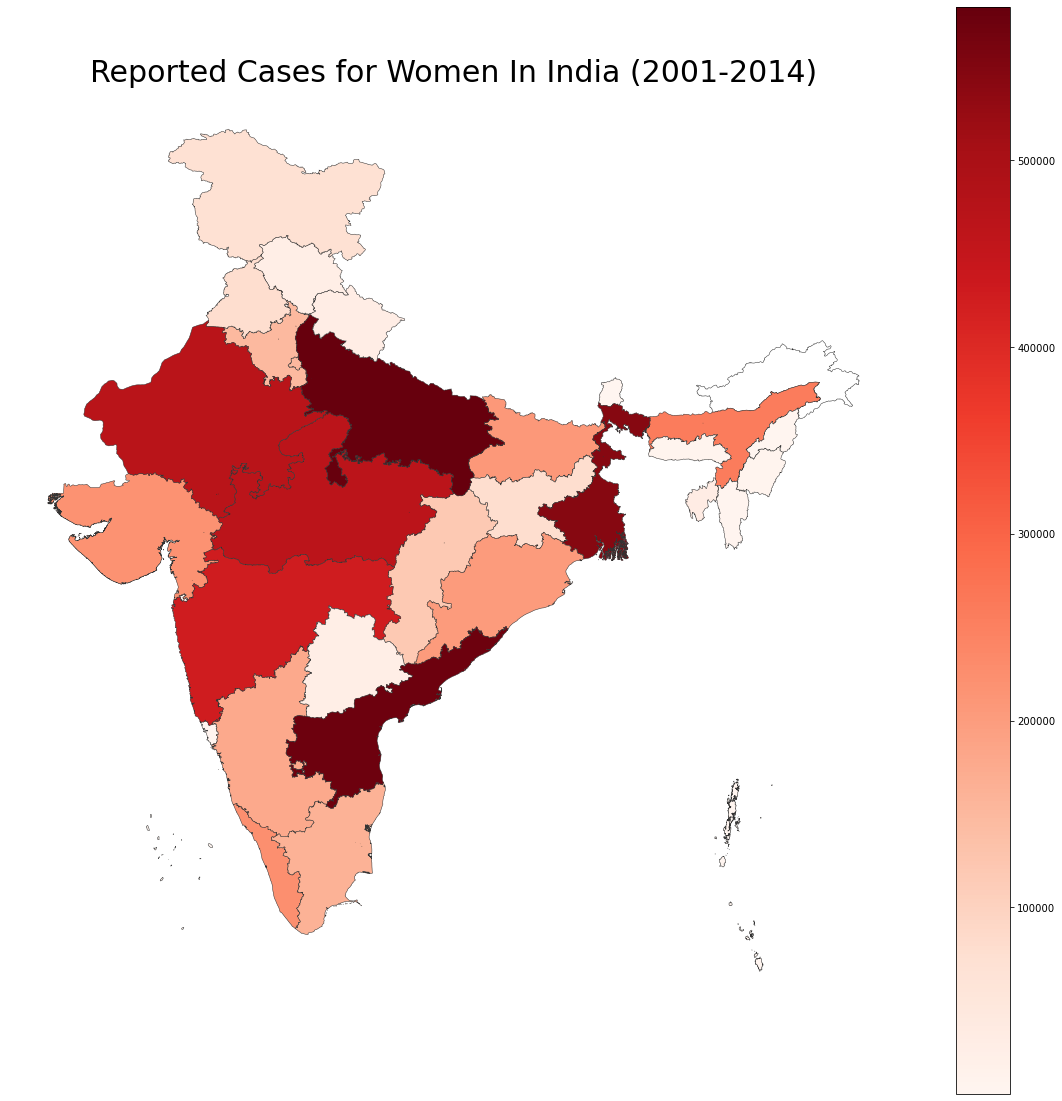

In [44]:
add_cw = pd.DataFrame(crime_women.groupby('STATE/UT').sum().reset_index())
add_cw['Sum of Reported Cases'] = add_cw['Rape'] + add_cw['Kidnapping and Abduction'] + add_cw['Dowry Deaths'] + add_cw['Assault on women with intent to outrage her modesty'] + add_cw['Insult to modesty of Women'] + add_cw['Cruelty by Husband or his Relatives'] + add_cw['Importation of Girls']
add_cw = add_cw[['STATE/UT', 'Sum of Reported Cases']]

merged = india_shp.set_index('st_nm').join(add_cw.set_index('STATE/UT'))

fig, ax = plt.subplots(1, figsize = (20, 20))
ax.axis('off')
ax.set_title('Reported Cases for Women In India (2001-2014)', fontdict = {'fontsize' : '30', 'fontweight' : '3'})
fig = merged.plot(column = 'Sum of Reported Cases', cmap = 'Reds', linewidth = .5, ax = ax, edgecolor = '.2', legend = True)

### 여성에게 가장 안전한 / 위험한 도시는 어디일까?

In [45]:
dd = crime_women.groupby('STATE/UT').sum().reset_index()
dd = dd[['STATE/UT', 'Rape', 'Kidnapping and Abduction', 
       'Dowry Deaths', 'Assault on women with intent to outrage her modesty',
      'Insult to modesty of Women', 'Importation of Girls']]
dd['Sum of Cases'] = dd['Rape'] + dd['Kidnapping and Abduction'] + dd['Dowry Deaths'] + dd['Assault on women with intent to outrage her modesty'] + dd['Insult to modesty of Women'] + dd['Importation of Girls']

In [46]:
top_10 = dd.sort_values(by =['Sum of Cases'], ascending = False).head(10)
low_10 = dd.sort_values(by =['Sum of Cases'], ascending = False).tail(10)

In [47]:
fig = make_subplots(rows = 2, cols = 1, subplot_titles = ['Most Dangerous City in India', 'Most the Safety City in India'])
fig.add_trace(go.Bar(x = top_10['Sum of Cases'], y = top_10['STATE/UT'], orientation = 'h', name = 'Dangerous Top10'), row = 1, col = 1)
fig.add_trace(go.Bar(x = low_10['Sum of Cases'], y = low_10['STATE/UT'], orientation = 'h', name = 'Safety Low10'), row = 2, col = 1)
fig.update_layout(width = 900, height = 900, title = 'City of Safety Grade in India', title_x = .5)
fig.show()

### Crime of PUNJAB City

In [48]:
total_crime = crime_women[crime_women['DISTRICT'] == 'TOTAL']

In [49]:
punjab_crime = total_crime[total_crime['STATE/UT'] == 'PUNJAB']

In [50]:
fig = go.Figure(data = [
    go.Line(name = 'Dowry Deaths',
          x = punjab_crime['Year'],
          y = punjab_crime['Dowry Deaths'],
           marker_color = 'orange'),
    go.Line(name = 'Assault on women with intent to outrage her modesty',
          x = punjab_crime['Year'],
          y = punjab_crime['Assault on women with intent to outrage her modesty'],
          marker_color = 'Purple'),
    go.Line(name = 'Cruelty by Husband or his Relatives',
           x = punjab_crime['Year'],
           y = punjab_crime['Cruelty by Husband or his Relatives'])
])
fig.update_layout(barmode = 'group', xaxis_title = 'Year', yaxis_title = 'Type of Deaths')
fig.update_layout(title = 'Deaths and Abuse for Women')
fig.show()

### 2013년의 범죄통계

In [51]:
data24 = crime_women[(crime_women['DISTRICT'] == 'TOTAL') & (crime_women['Year'] == 2013)]
data24 = data24.reset_index()

In [52]:
fig = go.Figure(data = [
    go.Bar(name = 'Rape', 
          y = data24['STATE/UT'],
          x = data24['Rape'],
          orientation = 'h'),
    go.Bar(name = 'Kidnapping and Abduction',
          y = data24['STATE/UT'],
          x = data24['Kidnapping and Abduction'],
          orientation = 'h'),
    go.Bar(name = 'Insult to modesty of women',
          y = data24['STATE/UT'],
          x = data24['Insult to modesty of Women'],
          orientation = 'h')
])

fig.update_layout(xaxis_title = 'No. of Cases in 2013', title = 'Any Cases in 2013', title_x = .5)
fig.show()

In [214]:
india_geo = gpd.read_file('C:/workspace/Data/India States/Indian_states.shp')
india_geo

,st_nm,geometry
0,Andaman & Nicobar Island,"MULTIPOLYGON (((93.71976 7.20707, 93.71909 7.2..."
1,Arunanchal Pradesh,"POLYGON ((96.16261 29.38078, 96.16860 29.37432..."
2,Assam,"MULTIPOLYGON (((89.74323 26.30362, 89.74290 26..."
3,Bihar,"MULTIPOLYGON (((84.50720 24.26323, 84.50355 24..."
4,Chandigarh,"POLYGON ((76.84147 30.75996, 76.83599 30.73623..."
5,Chhattisgarh,"POLYGON ((83.33532 24.09885, 83.35346 24.09627..."
6,Dadara & Nagar Havelli,"POLYGON ((73.20657 20.12216, 73.20797 20.10650..."
7,Daman & Diu,"MULTIPOLYGON (((72.89335 20.44539, 72.89281 20..."
8,Goa,"MULTIPOLYGON (((74.11918 14.75344, 74.11350 14..."
9,Gujarat,"MULTIPOLYGON (((71.70375 20.99958, 71.70375 20..."


In [217]:
crime_women.value_counts('STATE/UT')

STATE/UT
UTTAR PRADESH     878
MADHYA PRADESH    628
MAHARASHTRA       552
BIHAR             540
TAMIL NADU        469
                 ... 
Puducherry          3
Goa                 3
D&N Haveli          2
Chandigarh          2
Lakshadweep         2
Length: 70, dtype: int64

In [ ]:
# geodata 파일의 이름과 같게 만들어주기
crime_women['STATE/UT'] = crime_women['STATE/UT'].replace({''})